In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
from matplotlib.colors import LinearSegmentedColormap


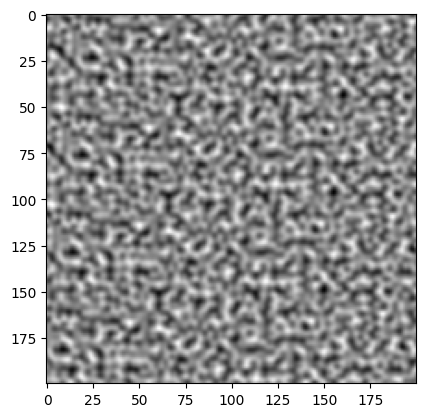

In [2]:
# generate several layers of perlin noise, with increasing frequency and decreasing amplitude

# create a PerlinNoise object
noise = PerlinNoise(octaves=38, seed=1)

# generate noise
size = 200
noise_img = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        noise_img[i][j] = noise([i / size, j / size])

# plot
plt.imshow(noise_img, cmap='gray')

In [3]:
noisy_imgs = []

octaves = [2, 4, 8, 16, 32]
for i in octaves:
    noise = PerlinNoise(octaves=i, seed=np.random.randint(0,1000))

    # generate noise
    size = 100
    noise_img = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            noise_img[i][j] = noise([i / size, j / size])

    noisy_imgs.append(noise_img)

In [4]:
# sum all the layers
summed_img = np.zeros((size, size))
for img in noisy_imgs:
    summed_img += img

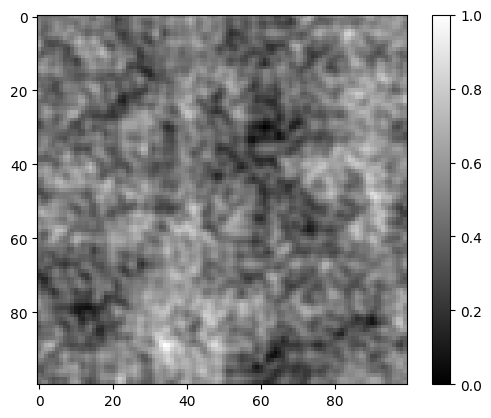

In [5]:
# plot

# normalize summed_img
summed_img = (summed_img - np.min(summed_img)) / (np.max(summed_img) - np.min(summed_img))

plt.imshow(summed_img, cmap='gray')
plt.colorbar()

In [6]:
# apply exponential function to the summed image
exp_img = np.exp(summed_img)


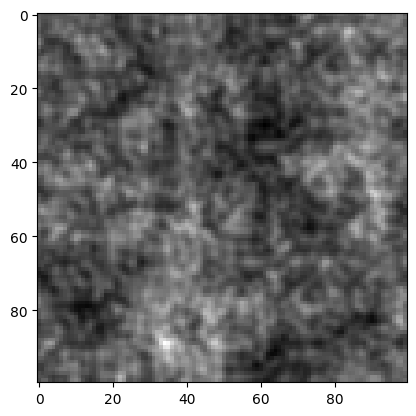

In [7]:
plt.imshow(exp_img, cmap='gray')    

In [52]:
def get_clouds(a):
    # Scale 'a' between 0 and 1
    a = a - np.min(a)
    a = a / np.max(a)

    # Parameters
    density = 0.5
    sharpness = 1

    # Apply transformation
    a = 1 - np.exp(-(a - (1 - density)) * sharpness)
    a[a < 0] = 0

    # Scale between 0 and 255 and quantize
    a = a / np.max(a)
    a = np.round(a * 255).astype(np.uint8)

    return a

In [53]:
exp_img = get_clouds(summed_img)

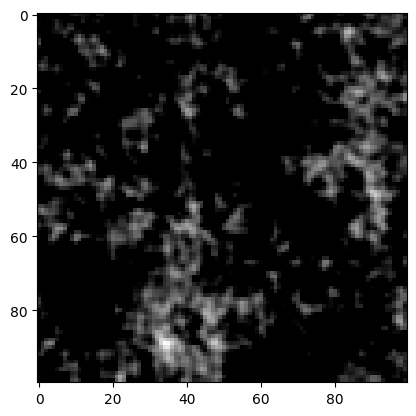

In [54]:
plt.imshow(exp_img, cmap='gray')

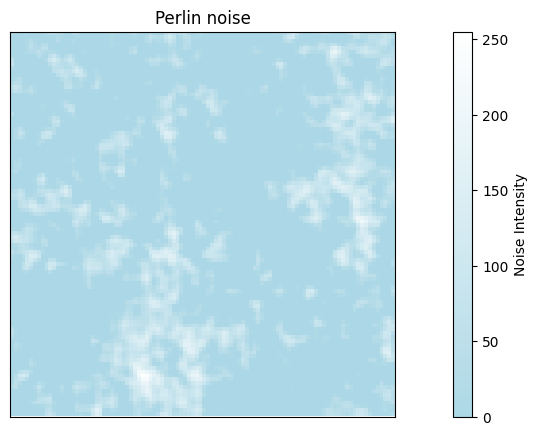

In [55]:
# Visualization function
def visualize_grid(grid, title=''):
    # Define a custom colormap from light blue to white
    colors = [(0.678, 0.847, 0.902), (1, 1, 1)]  # Light blue to white (RGB values)
    cmap = LinearSegmentedColormap.from_list('custom_blue_white', colors, N=256)

    # Plot the grid with the custom colormap
    plt.imshow(grid, cmap=cmap)
    # size of the plot
    plt.gcf().set_size_inches(15, 5)





    
    plt.colorbar(label='Noise Intensity')
    plt.title(title)
    plt.grid(False)  # Optional: hide gridlines for a cleaner look
    plt.xticks([])   # Optional: hide x-axis ticks
    plt.yticks([])   # Optional: hide y-axis ticks
    plt.show()

# Visualize the original grid and the noise
visualize_grid(exp_img, 'Perlin noise')